<h1>Loess regression<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-locally-weighted-linear-regression-(Loess)" data-toc-modified-id="Introduction-to-locally-weighted-linear-regression-(Loess)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to locally weighted linear regression (Loess)</a></span><ul class="toc-item"><li><span><a href="#Deriving-the-vectorized-implementation" data-toc-modified-id="Deriving-the-vectorized-implementation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Deriving the vectorized implementation</a></span></li><li><span><a href="#Implementation-in-python-(using-bell-shaped-kernel)" data-toc-modified-id="Implementation-in-python-(using-bell-shaped-kernel)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Implementation in python (using bell shaped kernel)</a></span></li><li><span><a href="#Implementation-in-Python-using-span-kernel-and-robustyfing-iterations" data-toc-modified-id="Implementation-in-Python-using-span-kernel-and-robustyfing-iterations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementation in Python using span kernel and robustyfing iterations</a></span></li><li><span><a href="#Applying-Loess-to-a-noisy-non-linear-dataset" data-toc-modified-id="Applying-Loess-to-a-noisy-non-linear-dataset-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Applying Loess to a noisy non linear dataset</a></span></li><li><span><a href="#Comparing-the-results" data-toc-modified-id="Comparing-the-results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Comparing the results</a></span></li><li><span><a href="#Alternative-implementations-using-Statsmodel" data-toc-modified-id="Alternative-implementations-using-Statsmodel-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Alternative implementations using Statsmodel</a></span></li></ul></li><li><span><a href="#Sources" data-toc-modified-id="Sources-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sources</a></span></li></ul></div>

# Introduction to locally weighted linear regression (Loess)

LOESS or LOWESS are non-parametric regression methods that combine multiple regression models in a k-nearest-neighbor-based meta-model. They address situations in which the classical procedures do not perform well or cannot be effectively applied without undue labor. LOESS combines much of the simplicity of linear least squares regression with the flexibility of nonlinear regression. It does this by fitting simple models to localized subsets of the data to build up a function that describes the variation in the data, point by point.

Local regression is sometimes referred to as a memory-based procedure, because like nearest-neighbors, we need all the training data each time we wish to compute a prediction. In order to perform local regression, there are a number of choices {ISLR - 7th Ed. p281} to be made, such as how to define the weighting function, and whether to fit a linear, constant, or quadratic regression. While all of these choices make some difference, the most important choice is the number of points which are considered as being 'local' to point $x_0$. This can be defined as the span $s$, which is the fraction of training points which are closest to $x_0$, or the bandwidth $\tau$ in case of a bell curve kernell, or a number of other names and terms depending on the literature used. 

This parameter plays a role like that of the tuning parameter $\lambda$ in smoothing splines: it controls the flexibility of the non-linear fit. The smaller the span, the more local and wiggly will be our fit; alternatively, a very large span will lead to a global fit to the data using all of the training observations. 

### **Procedure**

A linear function is fitted only on a local set of points delimited by a region, using weighted least squares. The weights are given by the heights of a kernel function (i.e. weighting function) giving:
- more weights to points near the target point $x_0$ whose response is being estimated
- less weight to points further away

We obtain then a fitted model that retains only the point of the model that are close to the target point $(x_0)$. The target point then moves away on the x axis and the procedure repeats for each points. 

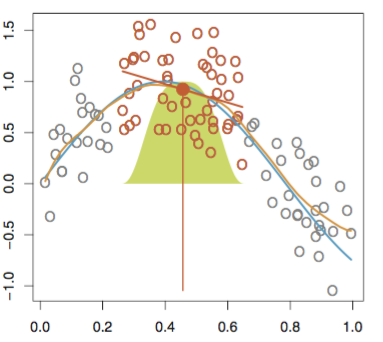

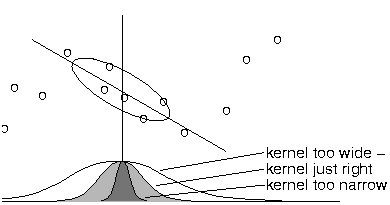

In [9]:
image1 = Image(filename='/Users/User/Desktop/Computer_Science/stanford_CS229/XavierNotes/images/Fig4.png') 
image2 = Image(filename='/Users/User/Desktop/Computer_Science/stanford_CS229/XavierNotes/images/Fig5.png') 
display(image1, image2)

*Local regression illustrated on some simulated data, where the blue curve represents $f(x)$ from which the data were generated, and the light orange curve corresponds to the local regression estimate. The orange colored points are local to the target point $x_0$, represented by the orange vertical line. The yellow bell-shape superimposed on the plot indicates weights assigned to each point, decreasing to zero with distance from the target point. The fit $f(x_0)$ at $x_0$ is obtained by fitting a weighted linear regression (orange line segment), and using the fitted value at $x_0$ (orange solid dot) as the estimate $f(x_0)$.*

Suppose we want to evaluate the hypothesis function $h$ at a certan query point $x$. For linear regression we would do the following:


- Fit $\theta$ to minimize $\sum_{i=1}^m ( y^{(i)} - \theta^T  x^{(i)} )^2$
- Output $\theta^Tx$


For locally weighted linear regression we will instead do the following:

- Fit $\theta$ to minimize $\sum_{i=1}^m w^{(i)} ( ^{(i)}y - \theta^T x^{(i)} )^2$
- Output $\theta^Tx$


A fairly standard choice for the weights is the following bell shaped function: 

$$ w^{(i)}  = \exp \left( - \frac{(x^{(i)} - x)^2}{2 \tau^2} \right)$$
Note that this is just a bell shaped curve, not a Gaussian probability function. 


And so the weights depend on the particular point $x$ at which we are trying to evaluate the regression. If $| x^{(i)} - x |$ is small then the weight $w^{(i)} $ is close to 1, and if $| x^{(i)} - x |$ is large then $w^{(i)} $ is small. Hence $\theta$ is chosen by giving a higher "weight" to the errors on training examples close to the query point $x$. The parameter $\tau$ controls how quickly the weight of a training example falls off with its distance the query point $x$ and is called the \textbf{bandwidth} parameter. In this case, increasing $\tau$ increases the "width" of the bell shape curve and makes further points have more weight.


If $x$ is a vector, then this generalizes to be:
$$ w^{(i)} = \exp \left( - \frac{(x^{(i)} - x)^T(x^{(i)} - x)}{2 \tau^2} \right) $$ 




### Advantages
- Allows us to put less care into selecting the features in order to avoid overfitting 
- Does not require specification of a function to fit a model to all of the data in the sample
- Only a Kernel function and smoothing / bandwidth parameters are required
- Very flexible, can model complex processes for which no theoretical model exists
- Considered one of the most attractive of the modern regression methods for applications that fit the general framework of least squares regression but which have a complex deterministic structure.

### Disadvantages
- Requires to keep the entire training set in order to make future predictions
- The number of parameters grows linearly with the size of the training set
- Computationally intensive, as a regression model is computed for each point
- Requires fairly large, densely sampled data sets in order to produce good models. This is because LOESS relies on the local data structure when performing the local fitting.
- Does not translate into a model that can be described by a mathematical formula. i.e. cannot be used for mechanistic modelling for example
- Like other least square methods, prone to the effect of outliers in the data set
- Although can be generalized to $p$ dimensions, locla regression can perform poorly if $p$ is much larger than about 3 or 4 because there will generally be very few training observations close to $x_0$. Nearest-neighbors regression suffers from a similar problem in high dimensions.


## Deriving the vectorized implementation

Consider the 1D case where $\Theta = [\theta_0, \theta_1]$ and $x$ and $y$ are vectors of size $m$. The cost function $J(\theta)$ is a weighted version of the OLS regression, where the weights $w$ are defined by some kernel function


\begin{aligned}
	J(\theta) &= \sum_{i=1}^m w^{(i)} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right)^2
	\\
	\frac{\partial J}{\partial \theta_0} &= -2 \sum_{i=1}^m w^{(i)} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right) 
	\\
	\frac{\partial J}{\partial \theta_1} &= -2 \sum_{i=1}^m w^{(i)} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right) x^{(i)} 
\end{aligned}
 

Cancelling the $-2$ terms, equating to zero, expanding and re-arranging the terms: 
\begin{aligned}
	& \frac{\partial J}{\partial \theta_0} = \sum_{i=1}^m w^{(i)} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right)  = 0
	\\
	& \sum_{i=1}^m w^{(i)}  \theta_0 + \sum_{i=1}^m w^{(i)}  \theta_1 x^{(i)}  = \sum_{i=1}^m w^{(i)} y^{(i)}  &\text{Eq. (1)}
	\\
	\\
	& \frac{\partial J}{\partial \theta_1} = \sum_{i=1}^m w^{(i)} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right) x^{(i)}  = 0 
	\\
	& \sum_{i=1}^m w^{(i)}  \theta_0 + \sum_{i=1}^m w^{(i)}  \theta_1 x^{(i)} x^{(i)}  = \sum_{i=1}^m w^{(i)} y^{(i)}  x^{(i)} &\text{Eq. (2)}
\end{aligned}
 
Writing Eq. (1) and Eq. (2) in matrix form $\mathbf{A \Theta = b}$ allows us to solve for $\Theta$
\begin{aligned}
	& \sum_{i=1}^m w^{(i)}  \theta_0 + \sum_{i=1}^m w^{(i)}  \theta_1 x^{(i)}  = \sum_{i=1}^m w^{(i)} y^{(i)}  
	\\
	& \sum_{i=1}^m w^{(i)}  \theta_0 + \sum_{i=1}^m w^{(i)}  \theta_1 x^{(i)} x^{(i)}  = \sum_{i=1}^m w^{(i)} y^{(i)}  x^{(i)}
	\\
	& \begin{bmatrix} \sum w^{(i)} & \sum w^{(i)} x^{(i)} \\ \sum w^{(i)} x^{(i)} & \sum w^{(i)} x^{(i)} x^{(i)} \end{bmatrix}  \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}   = \begin{bmatrix}  \sum w^{(i)} y^{(i)} \\  \sum w^{(i)} y^{(i)} x^{(i)} \end{bmatrix}  
	\\
	& \mathbf{A} \Theta = \mathbf{b}
	\\
	&  \Theta = \mathbf{A}^{-1} \mathbf{b}
\end{aligned}

## Implementation in python (using bell shaped kernel) 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from scipy import linalg
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')
%matplotlib inline

In [3]:
from math import ceil
import numpy as np
from scipy import linalg

#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau)   )

def lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> yest
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    m = len(x)
    yest = np.zeros(m)

    #Initializing all weights from the bell shape kernel function    
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    
    #Looping through all x-points
    for i in range(m):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

## Implementation in Python using span kernel and robustyfing iterations 
source: https://gist.github.com/agramfort/850437

In [4]:
from math import ceil
import numpy as np
from scipy import linalg

def lowess_ag(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

## Applying Loess to a noisy non linear dataset
As a case study, consider a sine function with random gaussian noise added.

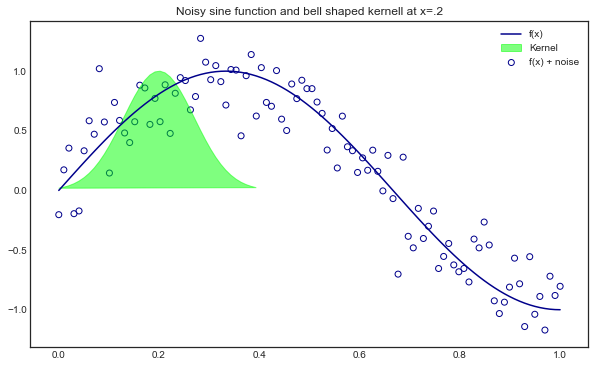

In [5]:
#Initializing noisy non linear data
x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = .25, size = 100)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = y + noise


#Plotting the noisy data and the kernell at around x = 0.2
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'f(x)')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'f(x) + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,.005), color = 'lime', alpha = .5, label = 'Kernel')
plt.legend()
plt.title('Noisy sine function and bell shaped kernell at x=.2')
plt.show()

## Comparing the results
- in orange, the algorithm implemented by Alexandre Gramfort, using robustifying iterations
- in red, algorithm using bell shaped kernel function only 

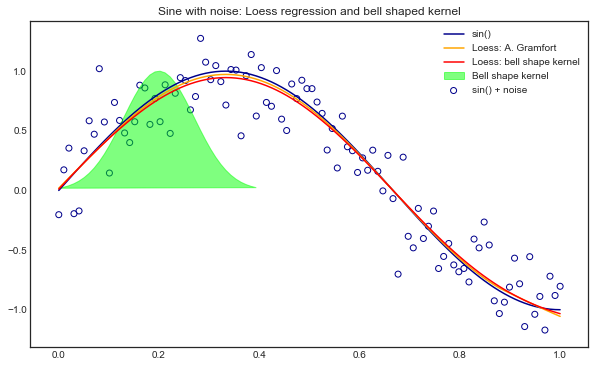

In [6]:
#Running LOESS
f = 0.25
yest = lowess_ag(x, y, f=f, iter=3)
yest_bell = lowess_bell_shape_kern(x,y)

plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'sin()')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,.005), color = 'lime', alpha = .5, label = 'Bell shape kernel')
plt.plot(x,yest,color = 'orange', label = 'Loess: A. Gramfort')
plt.plot(x,yest_bell,color = 'red', label = 'Loess: bell shape kernel')
plt.legend()
plt.title('Sine with noise: Loess regression and bell shaped kernel')
plt.show()

## Alternative implementations using Statsmodel 

In [7]:
import statsmodels.api as sm
lowess_sm = sm.nonparametric.lowess
yest_sm = lowess_sm(y,x,frac=1./3.,it=3, return_sorted = False)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


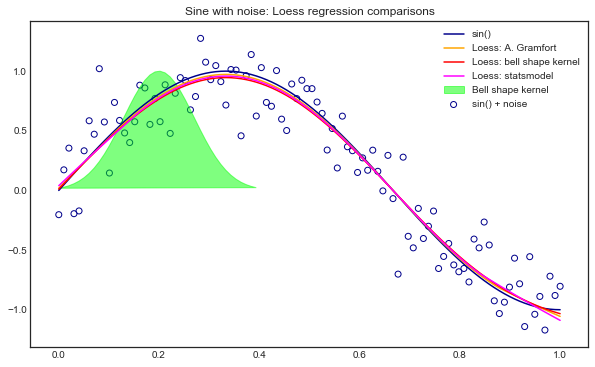

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'sin()')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,.005), color = 'lime', alpha = .5, label = 'Bell shape kernel')
plt.plot(x,yest,color = 'orange', label = 'Loess: A. Gramfort')
plt.plot(x,yest_bell,color = 'red', label = 'Loess: bell shape kernel')
plt.plot(x,yest_sm,color = 'magenta', label = 'Loess: statsmodel')
plt.legend()
plt.title('Sine with noise: Loess regression comparisons')
plt.show()

# Sources

https://www.olamilekanwahab.com/blog/2018/01/30/locally-weighted-regression/

http://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html

https://math.dartmouth.edu/~m50f15/Lowess.html

https://gerardnico.com/data_mining/local_regression

https://gist.github.com/agramfort/850437
